In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!ls "/content/drive/My Drive"

'Adsız klasör'
 Classes1.py
'Colab Notebooks'
'datasets_9109_12699_german_credit_data (1).csv'
 diabetes.csv
 Hitters.csv
 hmelq.csv
 HW_Data_Set.xlsx
 protein_ortak.ipynb
'SVM & SVR & NAIV BAYES.ipynb'
 SydneyHousePrices.csv
 VerilerinIncelenmesi-Oğuzhan.ipynb
 Wine.ipynb
 winemag-data_first150k.csv
"Wine's Data - PreProcessing.ipynb"


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

Credit = pd.read_csv("/content/drive/My Drive/datasets_9109_12699_german_credit_data (1).csv")
df = Credit.copy()
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [24]:
df.shape

(1000, 10)

In [25]:
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


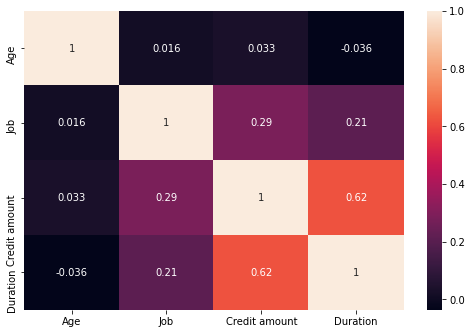

In [26]:
# Looking Corr table

from matplotlib import pyplot as plt

df1 = df.copy()
df1 = df1.corr()
plt.figure(figsize=(8.5,5.5))
corr = sns.heatmap(df1,xticklabels=df1.columns,yticklabels=df1.columns,annot=True)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [28]:
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


In [88]:
ss = pd.crosstab(df.Housing,df["Risk"],values=df["Credit amount"],aggfunc=["mean"],normalize=True)
ss

# EN
# In this cell, we can see each group diffrent by housing


# TR
# Ev durumu free olanlarin %24 ü bad risk iken %19 good risk
# Ev durumu own olanlarin %16 ü bad risk iken %12 good risk
# Ev durumu free olanlarin %15 ü bad risk iken %12 good risk

# Cikarilan sonuc Bad durumu en fazla FREE ardindan OWN daha sonra RENT sinifi olarak dagilmakta

mean          
Risk          bad      good
Housing                    
free     0.241235  0.194894
own      0.160947  0.123639
rent     0.156104  0.123181

In [83]:
# EN
# Creat a new variable beacuse scaling is good for forest methods


df.insert(1,"Cat Age",df["Age"])
for i in df["Cat Age"]:
    if i<25:
        df["Cat Age"]=df["Cat Age"].replace(i,"0-25")
    elif (i>=25) and (i<40):
        df["Cat Age"]=df["Cat Age"].replace(i,"25-30")
    elif (i>=40) and (i<45):
        df["Cat Age"]=df["Cat Age"].replace(i,"30-35")
    elif (i>=45) and (i<40):
        df["Cat Age"]=df["Cat Age"].replace(i,"35-40")
    elif (i>=40) and (i<50):
        df["Cat Age"]=df["Cat Age"].replace(i,"40-50")
    elif (i>=50) and (i<76):
        df["Cat Age"]=df["Cat Age"].replace(i,"50-75")

In [31]:
df.head(2)

,Age,Cat Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,50-75,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,0-25,female,2,own,little,moderate,5951,48,radio/TV,bad


In [84]:
aa = pd.crosstab(df["Cat Age"],df.Risk,values=df["Credit amount"],aggfunc=["mean"],normalize=True,)
aa*100

# EN 
# Now we are seeing BAD and GOOD by age's group



# TR
# Daha sonra yasi olceklendirdikten sonra soyle sonuclara bakiyoruz
# Baktigimiz zaman good ve bad ayriminin en fazla oldugu yer 50-75 yas arasindakiler oldugunu goruyoruz 
# Su durumda 50-75 yas grubu riskli grup olarak gorulebilir 
# Ayni zamanda GOOD degeri en iyi olan 30-35 yas arasi sinifa kredi verilirme tesvik gibi yonler artirilabilir

mean          
Risk           bad      good
Cat Age                     
0-25      9.575650  7.553783
25-30    10.800566  8.800624
30-35    11.494229  9.365350
40-50    11.528020  8.599817
50-75    15.219639  7.062321

In [89]:
bb = pd.crosstab(df["Purpose"],df.Risk,values=df["Credit amount"],aggfunc=["mean"],normalize=True)
bb*100

# EN
# continue to explore data 


# TR
# Kredi cekilis ama hangi amacla cekilmis? amaclara gore dagilimlar nasil?
# Baktigimiz zaman vacation/others sinifi icin cekilen kredi miktari en fazla bad oranina sahip
# En dusuk bad oranina sahip olan sinifin ise Domestic appliances oldugu gorulmekte

mean          
Risk                       bad      good
Purpose                                 
business              9.347875  5.599191
car                   7.019422  5.918815
domestic appliances   2.611946  2.429891
education             5.240301  4.497335
furniture/equipment   6.061011  4.645631
radio/TV              4.622379  3.997639
repairs               4.640526  4.475840
vacation/others      19.229640  9.662560

In [34]:
from scipy import stats

df1 = df.copy()

df1 = df1[["Credit amount","Purpose"]]

group = pd.unique(df1.Purpose.values)

d_v1 = {grp:df1["Credit amount"][df1.Purpose == grp] for grp in group}

stats.levene(d_v1['radio/TV'],d_v1['furniture/equipment'],d_v1['car'],d_v1['business'],d_v1['domestic appliances'],d_v1['repairs'],
                     d_v1['vacation/others'],d_v1['education'])

# EN
# Is there a difference between the amount of credit the Purpose variable demands?


# TR
# Varyanslar homojen degil bu durumda KRUSKALL testi tercih edilebilir ama biz normal parametrik olani kullanacagiz

LeveneResult(statistic=11.506286350981943, pvalue=4.177745359274538e-14)

In [35]:
f, p = stats.f_oneway(d_v1['radio/TV'],d_v1['furniture/equipment'],d_v1['car'],d_v1['business'],d_v1['domestic appliances'],d_v1['repairs'],
                     d_v1['vacation/others'],d_v1['education'])

("F istatistik: "+str(f)+" | P value degeri: "+str(p))

# EN
# Apply Oneway anova

# TR
# Sonuca bakinca siniflar arasinda Cekilen kredi miktarinda anlamli bir farklilik gozukmekte

'F istatistik: 13.34142171179633 | P value degeri: 1.585947764999813e-16'

In [36]:
(df.groupby(by=["Purpose"])[["Credit amount"]].agg("sum") / df["Credit amount"].sum())*100

# EN
# In the result, there is different between groups.
# In this query we can see difference


# TR
# Bu esitsizliginde hangi gruplar tarafindan olusturuldugunu gorebilmekteyiz
# Car & furniture/equipment & radio/TV en fazla kredi verilen siniflar olmus
# Onceki islemlere donup baktigimiz zaman vacation/others sinifi BAD degeri en yuksekti ve burada da verilen kredi dusuk gozukuyor

,Credit amount
Purpose,
business,12.329507
car,38.819347
domestic appliances,0.549513
education,5.192895
furniture/equipment,16.969771
radio/TV,21.292818
repairs,1.834707
vacation/others,3.011441


In [37]:
table = pd.crosstab(df["Sex"],df["Risk"])

table

# EN
# if there are two categorical variable, use to Chi2 test.

# TR
# Bazi Iki kategorik grubu ve bu siniflardan birinde olma durumuna gore bad yada good olma arasinda bir iliski var mi karsilastiralim

Risk,bad,good
Sex,,
female,109,201
male,191,499


In [38]:
observed_values = table.values
print("Observe Values: -\n",observed_values)

Observe Values: -
 [[109 201]
 [191 499]]


In [39]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(table)
print("Kikare degeri {} ve P value {}".format(chi2,p))

# EN
# P value < 0.05 H0 rejected
# There is a depend between Risk and Sex 


# TR
# H0: Iki degisken arasinda bir iliski yoktur
# H1: Iki degisken arasinda iliski vardır

# Sonuca bakinca H0 red edilmistir. Yani iki degisken arasinda bir iliski vardir.
# Kadin yada erkek olma durumuna gore Bad olma ve Good olma durumu degiskenlik gostermektedir

Kikare degeri 5.348516218081436 ve P value 0.020739913068713305


In [40]:
# Bir diger merak ettigim durum ise Ev durumuna gore acaba risk gruplari arasinda anlamli bir farklilik var midir?

housing_risk = pd.crosstab(df["Housing"],df["Risk"])

housing_risk

Risk,bad,good
Housing,,
free,44,64
own,186,527
rent,70,109


In [41]:
observed_values1 = housing_risk.values
print("Observe Values: -\n",observed_values1)

Observe Values: -
 [[ 44  64]
 [186 527]
 [ 70 109]]


In [42]:
chi2, p, dof, ex = chi2_contingency(housing_risk)
print("Kikare degeri {} ve P value {}".format(chi2,p))

# EN
# P value < 0.05 H0 rejected
# There is a depend between Risk and Housing 


# H0: Iki degisken arasinda bir iliski yoktur
# H1: Iki degisken arasinda iliski vardır

# Gozle gorulebilir bir farklilik oldugu belliydi.
# Lakin bu formel degildi ve test sonucu bunun formelligi de kesinlesmis bulunmakta.
# Ev sahibi durumuna gore krediyi odeyememe(bad) veya krediyi odeme(good) durumu arasinda anlamli bir iliski vardir

Kikare degeri 18.19984158256362 ve P value 0.00011167465374597684


In [43]:
# EN 
# I am creating new variable
# This variable is Monthly pay

# TR
# Simdi var olan data setinden bir degisken turetecegim
# Bu degisken ise Cekilen kredi miktarinin odenecek aya bolumu
# Yani kisinin aylik odemesi

df["monthly pay"] = (df["Credit amount"] / df["Duration"]) 

In [6]:
df.head(3)

,Age,Cat Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,monthly pay
0,67,50-75,male,2,own,NaN,little,1169,6,radio/TV,good,194.833333
1,22,0-25,female,2,own,little,moderate,5951,48,radio/TV,bad,123.979167
2,49,40-50,male,1,own,little,NaN,2096,12,education,good,174.666667


In [44]:
df[df["Sex"] == "female"]["monthly pay"].agg(["min","max"])

# EN
# Min and Max difference is huge
# If we will use the MEAN in this case do not use
# instead we should use MEDIAN 


# TR
# Aylik odeme miktarinda median kullanmak daha saglikli

min     24.055556
max    845.000000
Name: monthly pay, dtype: float64

In [45]:
dd = pd.crosstab(df.Risk,df.Sex,values=df["monthly pay"],aggfunc=["median"]) 
dd

# EN
# Median used


# TR
# Kadin ve erkeklerde aylik odemesi daha dusuk olanlar bad sinifina girmis bulunmakta
# Aylik odemesi yuksek olanlarin ise daha cok good sinifinda oldugunu goruyorum

median            
Sex       female        male
Risk                        
bad   113.250000  124.833333
good  133.194444  138.230769

In [46]:
# Coralation between variables

# Simdi korelasyon degerlerine bakacagim 

df.corr()

,Age,Job,Credit amount,Duration,monthly pay
Age,1.000000,0.015673,0.032716,-0.036136,0.100176
Job,0.015673,1.000000,0.285385,0.210910,0.109459
Credit amount,0.032716,0.285385,1.000000,0.624984,0.521938
Duration,-0.036136,0.210910,0.624984,1.000000,-0.126498
monthly pay,0.100176,0.109459,0.521938,-0.126498,1.000000


In [47]:
# EN 
# I am creating new variable again but this variable job is only help raise prediction


# TR
# Ardindan toplam cekilen kredi miktarinin karesini olarak modele ekleyecegim
# Bunu yapmamdaki sebep ise modelde ekstra bir degisken daha tutarak her hangi bir aciklayicilik artacak mi?
# Ayni zamanda modele predict(tahmin) acisindan bir katkisi olacak mi gormek istiyorum

df["Credit amount**2"] = df["Credit amount"]**2
df.head(2)

,Age,Cat Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,monthly pay,Credit amount**2
0,67,50-75,male,2,own,NaN,little,1169,6,radio/TV,good,194.833333,1366561
1,22,0-25,female,2,own,little,moderate,5951,48,radio/TV,bad,123.979167,35414401


In [48]:
df.corr()

,Age,Job,Credit amount,Duration,monthly pay,Credit amount**2
Age,1.000000,0.015673,0.032716,-0.036136,0.100176,0.041525
Job,0.015673,1.000000,0.285385,0.210910,0.109459,0.241287
Credit amount,0.032716,0.285385,1.000000,0.624984,0.521938,0.938213
Duration,-0.036136,0.210910,0.624984,1.000000,-0.126498,0.521089
monthly pay,0.100176,0.109459,0.521938,-0.126498,1.000000,0.495639
Credit amount**2,0.041525,0.241287,0.938213,0.521089,0.495639,1.000000


In [49]:
df.head()

,Age,Cat Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,monthly pay,Credit amount**2
0,67,50-75,male,2,own,NaN,little,1169,6,radio/TV,good,194.833333,1366561
1,22,0-25,female,2,own,little,moderate,5951,48,radio/TV,bad,123.979167,35414401
2,49,40-50,male,1,own,little,NaN,2096,12,education,good,174.666667,4393216
3,45,40-50,male,2,free,little,little,7882,42,furniture/equipment,good,187.666667,62125924
4,53,50-75,male,2,free,little,little,4870,24,car,bad,202.916667,23716900


In [50]:
# EN
# Scaling Duration 


# TR
# Degisken donusumlerini hepsini gerceklestirip hangi durumda modeller nasil sonuclar veriyor onlari gormek icin son olarak,
# Duration kismini da olceklendiriyorum sebebi ise agaclandirma yapilarinda kategorik olanlar daha iyi sonuc verebilmekte
# Ayni zamanda degisken Vadeyi belirtiyor buda ayni zaman da kesikli oldugunu ve kategorik bir yapi sergiledigini hissetiriyor

df.insert(9,"Cat Duration",df["Duration"])
for i in df["Cat Duration"]:
    if i<12:
        df["Cat Duration"]=df["Cat Duration"].replace(i,"0-12")
    elif (i>=12) and (i<24):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"12-24")
    elif (i>=24) and (i<36):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"24-36")
    elif (i>=36) and (i<48):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"36-48")
    elif (i>=48) and (i<60):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"48-60")
    elif (i>=60) and (i<=72):
        df["Cat Duration"]=df["Cat Duration"].replace(i,"60-72")

In [51]:
df.head(2)

,Age,Cat Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Cat Duration,Purpose,Risk,monthly pay,Credit amount**2
0,67,50-75,male,2,own,NaN,little,1169,6,0-12,radio/TV,good,194.833333,1366561
1,22,0-25,female,2,own,little,moderate,5951,48,48-60,radio/TV,bad,123.979167,35414401


In [52]:
# EN
# I scaled Age and Duration now drop that variables it.


# TR
# Age(Yas) degiskenini ve Duration degiskenini cikariyorum veri setinden 
# Ayni zamanda kategorik olanlari Dummy hale getirecegim

df.drop(labels=["Age","Duration"],inplace=True,axis=1)
df.head(2)

,Cat Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Cat Duration,Purpose,Risk,monthly pay,Credit amount**2
0,50-75,male,2,own,NaN,little,1169,0-12,radio/TV,good,194.833333,1366561
1,0-25,female,2,own,little,moderate,5951,48-60,radio/TV,bad,123.979167,35414401


In [53]:
df.nunique()

Cat Age               5
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Cat Duration          6
Purpose               8
Risk                  2
monthly pay         965
Credit amount**2    921
dtype: int64

# EN
# Preparation

In [54]:
# EN
# Preparation

# TR
# 2 den fazla olanlara Get dummy yaptim, cunku diger turlu bunlarin arasinda bir siralama olacagini dusunerek sayisi yuksek olana agirlik verecekti

df = pd.get_dummies(df,columns= ["Cat Age"], prefix= ["Cat Age"]) 
df = pd.get_dummies(df,columns= ["Job"], prefix= ["Job"])
df = pd.get_dummies(df,columns= ["Housing"], prefix= ["Housing"])
df = pd.get_dummies(df,columns= ["Saving accounts"], prefix= ["Saving accounts"])
df = pd.get_dummies(df,columns= ["Cat Duration"], prefix= ["Cat Duration"])
df = pd.get_dummies(df,columns= ["Checking account"], prefix= ["Checking account"])
df = pd.get_dummies(df,columns= ["Purpose"], prefix= ["Purpose"])
df = pd.get_dummies(df,columns= ["Sex"], prefix= ["Sex"])

In [55]:
# Geriye kalan Sex ve Risk degiskenine LabelEncoder yapacagim 2 sinif olmasindan sebep

from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()


df["Risk"] = lbe.fit_transform(df["Risk"])

df.head(2)

,Credit amount,Risk,monthly pay,Credit amount**2,Cat Age_0-25,Cat Age_25-30,Cat Age_30-35,Cat Age_40-50,Cat Age_50-75,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Cat Duration_0-12,Cat Duration_12-24,Cat Duration_24-36,Cat Duration_36-48,Cat Duration_48-60,Cat Duration_60-72,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_female,Sex_male
0,1169,1,194.833333,1366561,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,5951,0,123.979167,35414401,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [56]:
# Already we have Sex column, drop other

df.drop(labels=["Sex_female"],axis=1,inplace=True)


In [57]:




# Simdi DEGISKENLERDEKI NaN degerleri dusurmustuk. Bu sekilde model kuracagim ve daha sonra impute islemi gerceklestirip sonuclari degerlendirecegim.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier


In [58]:
from sklearn.model_selection import train_test_split

y = df["Risk"]
X = df.drop(['Risk'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.30, 
                                                   random_state=42)

# Before bulding the model, I am scaling X_train X_test beacuse Neural Network It works that way

In [59]:
int_float_train = list(X_train.select_dtypes(include=["float64","int64"]))
int_float_train

['Credit amount', 'monthly pay', 'Credit amount**2']

In [60]:
int_float_test = list(X_test.select_dtypes(include=["float64","int64"]))
int_float_test

['Credit amount', 'monthly pay', 'Credit amount**2']

In [61]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled.loc[:,int_float_train] = scaler.fit_transform(X_train_scaled.loc[:,int_float_train])
X_test_scaled.loc[:,int_float_test] = scaler.fit_transform(X_test_scaled.loc[:,int_float_test])

In [62]:
X_train_scaled.head()

,Credit amount,monthly pay,Credit amount**2,Cat Age_0-25,Cat Age_25-30,Cat Age_30-35,Cat Age_40-50,Cat Age_50-75,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Cat Duration_0-12,Cat Duration_12-24,Cat Duration_24-36,Cat Duration_36-48,Cat Duration_48-60,Cat Duration_60-72,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male
541,-0.462936,-0.581455,-0.418234,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
440,-0.512772,-0.078797,-0.433108,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
482,0.072458,-0.330821,-0.187524,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
422,-0.824580,-0.615043,-0.500646,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
778,0.775879,-0.067408,0.312826,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [63]:
tree_model=DecisionTreeClassifier().fit(X_train,y_train)
randomforest_model=RandomForestClassifier().fit(X_train,y_train)
ysa_model= MLPClassifier().fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Karar agacinin Train seti Accuracy Scoru : ",accuracy_score(y_train,tree_model.predict(X_train)))
print("Karar agacinin Test seti Accuracy Scoru : ",accuracy_score(y_test,tree_model.predict(X_test)))
print("Test setine ait Recall, F1 Score gibi detaylar: \n",classification_report(y_test,tree_model.predict(X_test)))

Karar agacinin Train seti Accuracy Scoru :  1.0
Karar agacinin Test seti Accuracy Scoru :  0.6966666666666667
Test setine ait Recall, F1 Score gibi detaylar: 
               precision    recall  f1-score   support

           0       0.50      0.41      0.45        91
           1       0.76      0.82      0.79       209

    accuracy                           0.70       300
   macro avg       0.63      0.61      0.62       300
weighted avg       0.68      0.70      0.69       300



In [65]:
print("YSA  Train seti Accuracy Scoru : ",accuracy_score(y_train,ysa_model.predict(X_train_scaled)))
print("YSA Test seti Accuracy Scoru : ",accuracy_score(y_test,ysa_model.predict(X_test_scaled)))
print("Test setine ait Recall, F1 Score gibi detaylar: \n",classification_report(y_test,ysa_model.predict(X_test_scaled)))

YSA  Train seti Accuracy Scoru :  0.9128571428571428
YSA Test seti Accuracy Scoru :  0.7166666666666667
Test setine ait Recall, F1 Score gibi detaylar: 
               precision    recall  f1-score   support

           0       0.55      0.34      0.42        91
           1       0.75      0.88      0.81       209

    accuracy                           0.72       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.69      0.72      0.69       300



In [66]:
print("Random Forest Train seti Accuracy Scoru : ",accuracy_score(y_train,randomforest_model.predict(X_train)))
print("Random Forest Test seti Accuracy Scoru : ",accuracy_score(y_test,randomforest_model.predict(X_test)))
print("Test setine ait Recall, F1 Score gibi detaylar: \n",classification_report(y_test,randomforest_model.predict(X_test)))

Random Forest Train seti Accuracy Scoru :  1.0
Random Forest Test seti Accuracy Scoru :  0.7333333333333333
Test setine ait Recall, F1 Score gibi detaylar: 
               precision    recall  f1-score   support

           0       0.62      0.31      0.41        91
           1       0.75      0.92      0.83       209

    accuracy                           0.73       300
   macro avg       0.69      0.61      0.62       300
weighted avg       0.71      0.73      0.70       300



In [67]:
# EN
# We can see Recall & F1 Score of predict 0 is low
# the reason is Unbalanced data


# TR
# Dikkati ceken durum 0 tahmin durumunun dusuk olmasidir
# Bunun sebebi ise dengesiz(unbalanced) bir veri seti olmasidir

df["Risk"].value_counts()

1    700
0    300
Name: Risk, dtype: int64

# Now all models will be Tuned

In [89]:


from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def YsaClassifier(X_train,y_train,X_test,y_test):
        scaler = StandardScaler()

        X_train_scale = scaler.fit_transform(X_train)

        X_test_scale =  scaler.fit_transform(X_test)
  
  
        mlp_regres = MLPClassifier().fit(X_train_scale,y_train) 
        y_pred = mlp_regres.predict(X_test_scale)
        Accuaracy = accuracy_score(y_test,y_pred)
        matrix = classification_report(y_test,y_pred)
  

        params = {"alpha":[0.1,0.01,0.02,0.005], # alpha icin aranacak degerler
              "hidden_layer_sizes":[(20,20),(100,50,150),(300,200,150)], # gizli katmanin dereceleri ve sayilari icin aranacak parametreler
              "activation":["relu","logistig"],
              'solver': ['adam', 'lbfgs']}# Son olarak birde iki tane fonksiyon var onlari denesin denedik 

        mlp_c = MLPClassifier()
  
        mlp_c = GridSearchCV(mlp_c,params,
                       cv = 10,
                       n_jobs = -1,
                       verbose = 2)

        mlp_c_tune = mlp_c.fit(X_train_scale,y_train)

        bos = []
        for i in mlp_c_tune.best_params_:
            bos.append(mlp_c_tune.best_params_[i])

        mlp_tuned = MLPClassifier(activation=bos[0],
                         alpha=bos[1],hidden_layer_sizes=bos[2],
                         solver=bos[3]).fit(X_train_scale,y_train)

        y_pred1 = mlp_tuned.predict(X_test_scale)

        Accuaracy1 = accuracy_score(y_test,y_pred1)
        matrix1 = classification_report(y_test,y_pred1)


        print("Tune Edilmemis Tahmin sonuclari Accuracy degeri: ",Accuaracy)
        print("-------------------------------")
        print("Tune Edilmemis Recall,F1 etc  sonuc: \n",matrix)
        print("****************************************************")
        print("Tune sonrasi Tahmin sonuclari Accuracy degeri:",Accuaracy1)
        print("-------------------------------")
        print("Tune sonrasi Recall,F1 etc sonuc: \n",matrix1)


YsaClassifier(X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.9min finished


Tune Edilmemis Tahmin sonuclari Accuracy degeri:  0.67
-------------------------------
Tune Edilmemis Recall,F1 etc  sonuc: 
               precision    recall  f1-score   support

           0       0.45      0.36      0.40        91
           1       0.74      0.80      0.77       209

    accuracy                           0.67       300
   macro avg       0.59      0.58      0.59       300
weighted avg       0.65      0.67      0.66       300

****************************************************
Tune sonrasi Tahmin sonuclari Accuracy degeri: 0.6366666666666667
-------------------------------
Tune sonrasi Recall,F1 etc sonuc: 
               precision    recall  f1-score   support

           0       0.40      0.38      0.39        91
           1       0.74      0.75      0.74       209

    accuracy                           0.64       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.63      0.64      0.63       300



In [90]:
def DecisionClassifier(X_train,y_train,X_test,y_test):
        cart = DecisionTreeClassifier()
        cart_model = cart.fit(X_train, y_train)
        y_pred = cart_model.predict(X_test)
        Accuaracy = accuracy_score(y_test, y_pred)
        matrix = classification_report(y_test,y_pred)

        cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)),
             "criterion":["gini","entropy"],
             "min_samples_leaf": range(50,100)}

        cart = DecisionTreeClassifier()
        cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
        cart_cv_model = cart_cv.fit(X_train, y_train)

        bos = []

        for i in cart_cv_model.best_params_:
              bos.append(cart_cv_model.best_params_[i])

        cart = DecisionTreeClassifier(criterion = bos[0],max_depth = bos[1],min_samples_leaf=bos[2],min_samples_split = bos[3])
        cart_tuned = cart.fit(X_train, y_train)

        y_pred = cart_tuned.predict(X_test)
        Accuaracy1 = accuracy_score(y_test, y_pred)
        matrix1 = classification_report(y_test,y_pred)

        print("En iyi parametre degerleri: ",cart_cv_model.best_params_)
        print("Tune edilmemis modelin Accuaracy ve Detaylar: ")
        print(Accuaracy)
        print(matrix)
        print("**********************************************")
        print("Tune sonrasi Accuaracy ve Detaylar: ")
        print(Accuaracy1)
        print(matrix1) 


DecisionClassifier(X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 43200 candidates, totalling 432000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4540 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 11036 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 20092 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 31772 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 46012 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 62876 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 82300 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 104348 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 128956 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 156188 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 185980 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 218396 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 253372 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Do

En iyi parametre degerleri:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 54, 'min_samples_split': 2}
Tune edilmemis modelin Accuaracy ve Detaylar: 
0.6833333333333333
              precision    recall  f1-score   support

           0       0.47      0.38      0.42        91
           1       0.75      0.81      0.78       209

    accuracy                           0.68       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.67      0.68      0.67       300

**********************************************
Tune sonrasi Accuaracy ve Detaylar: 
0.77
              precision    recall  f1-score   support

           0       0.66      0.49      0.57        91
           1       0.80      0.89      0.84       209

    accuracy                           0.77       300
   macro avg       0.73      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300



Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 10.9min finished


En iyi parametre degerleri:  {'max_depth': 8, 'max_features': 5, 'min_samples_split': 20, 'n_estimators': 500}
                                               
Tune oncesi Accuracy ve Recall,F1 degerleri:  0.7266666666666667 
               precision    recall  f1-score   support

           0       0.60      0.30      0.40        91
           1       0.75      0.91      0.82       209

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.61       300
weighted avg       0.70      0.73      0.69       300

Tune sonrasi Accuracy ve Recall,F1  degerleri:  0.73 
               precision    recall  f1-score   support

           0       0.78      0.15      0.26        91
           1       0.73      0.98      0.84       209

    accuracy                           0.73       300
   macro avg       0.75      0.57      0.55       300
weighted avg       0.74      0.73      0.66       300

                                                
(<matplotlib.axe

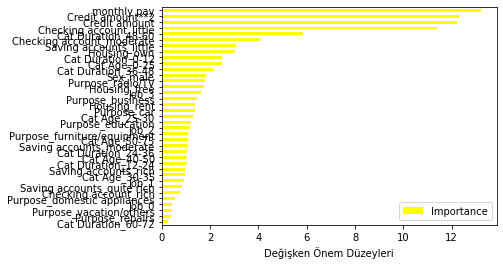

In [91]:
def RandomForestsClass(X_train,y_train,X_test,y_test):
        rf_model = RandomForestClassifier().fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        Accuracy = accuracy_score(y_test, y_pred)  
        Matrix = classification_report(y_test,y_pred)

        params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [7,15,20]}


        rf_model = RandomForestClassifier()

        rf_cv_model = GridSearchCV(rf_model,
                           params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

        rf_cv_model.fit(X_train,y_train)  

        bos = []

        for i in rf_cv_model.best_params_:

              bos.append(rf_cv_model.best_params_[i])

        final_tune = RandomForestClassifier(max_depth=bos[0],max_features=bos[1],min_samples_split=bos[2],n_estimators=bos[3])

        final_tune = final_tune.fit(X_train,y_train)

        y_pred = final_tune.predict(X_test)

        Accuracy1 = accuracy_score(y_test,y_pred)
        Matrix1 = classification_report(y_test,y_pred)


        Importance = pd.DataFrame({"Importance": final_tune.feature_importances_*100},
                         index = X_train.columns)
        importance = Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "yellow"),plt.xlabel("Değişken Önem Düzeyleri")

        print("En iyi parametre degerleri: ",rf_cv_model.best_params_)
        print("                                               ")
        print("Tune oncesi Accuracy ve Recall,F1 degerleri: ",Accuracy,"\n",Matrix)
        print("Tune sonrasi Accuracy ve Recall,F1  degerleri: ",Accuracy1,"\n",Matrix1)
        print("                                                ")
        print(importance)


RandomForestsClass(X_train,y_train,X_test,y_test)

In [69]:
X_train.columns

# EN
# After at the Random forest, the best importance factors come to light
# Their names are
# 1-'monthly pay'
# 2-'Credit amount**2'
# 3-'Credit amount'
# 4-'Checking account_little'
# 5-'Cat Duration_48-60'
# 6-'Checking account_moderate'


# TR
# Degisken onem duzeyine baktigimiz da cikan sonucta oncelikli olarak;
# 1-'monthly pay'
# 2-'Credit amount**2'
# 3-'Credit amount'
# 4-'Checking account_little'
# 5-'Cat Duration_48-60'
# 6-'Checking account_moderate'

# durumlarina gore tahmin sonuclarinda en etkili olanlar olarak gorulmekte
# Burada 2 adet degiskeni kendim olusturmustum. "Monthly pay" ve "Credit amount**2" ikincisini tamamiyle tahmin sonucunu artirmak adina kullandim.
# Simdi bu degiskenlerden basit bir karar agaci gorseli gorelim

Index(['Credit amount', 'monthly pay', 'Credit amount**2', 'Cat Age_0-25',
       'Cat Age_25-30', 'Cat Age_30-35', 'Cat Age_40-50', 'Cat Age_50-75',
       'Job_0', 'Job_1', 'Job_2', 'Job_3', 'Housing_free', 'Housing_own',
       'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Cat Duration_0-12', 'Cat Duration_12-24', 'Cat Duration_24-36',
       'Cat Duration_36-48', 'Cat Duration_48-60', 'Cat Duration_60-72',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male'],
      dtype='object')

# Creating decision tree visual with 5 important variables

In [71]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

degisken = ["monthly pay","Credit amount","Checking account_little","Cat Duration_48-60","Checking account_moderate"]

data = df.loc[:,degisken]

data.head(2)




,monthly pay,Credit amount,Checking account_little,Cat Duration_48-60,Checking account_moderate
0,194.833333,1169,1,0,0
1,123.979167,5951,0,1,1


In [78]:
X = data
y = df["Risk"]

forest = RandomForestClassifier(max_depth = 3, n_estimators=5)
forest.fit(X,y)

estimator = forest.estimators_[4]
target_names = ["Result 0","Result 1"]


from sklearn.tree import export_graphviz

export_graphviz(estimator,out_file="tree_limited.dot",feature_names=X.columns,
                class_names=target_names,rounded = True, proportion = False, precision = 2, filled = True)



In [79]:
forest_1 = RandomForestClassifier(max_depth = None, n_estimators=5)
forest_1 = forest_1.fit(X,y)
estimator_non = forest_1.estimators_[4]

export_graphviz(estimator_non, out_file='tree_nonlimited.dot', feature_names = X.columns,
                class_names = target_names,
                rounded = True, proportion = False, precision = 2, filled = True)

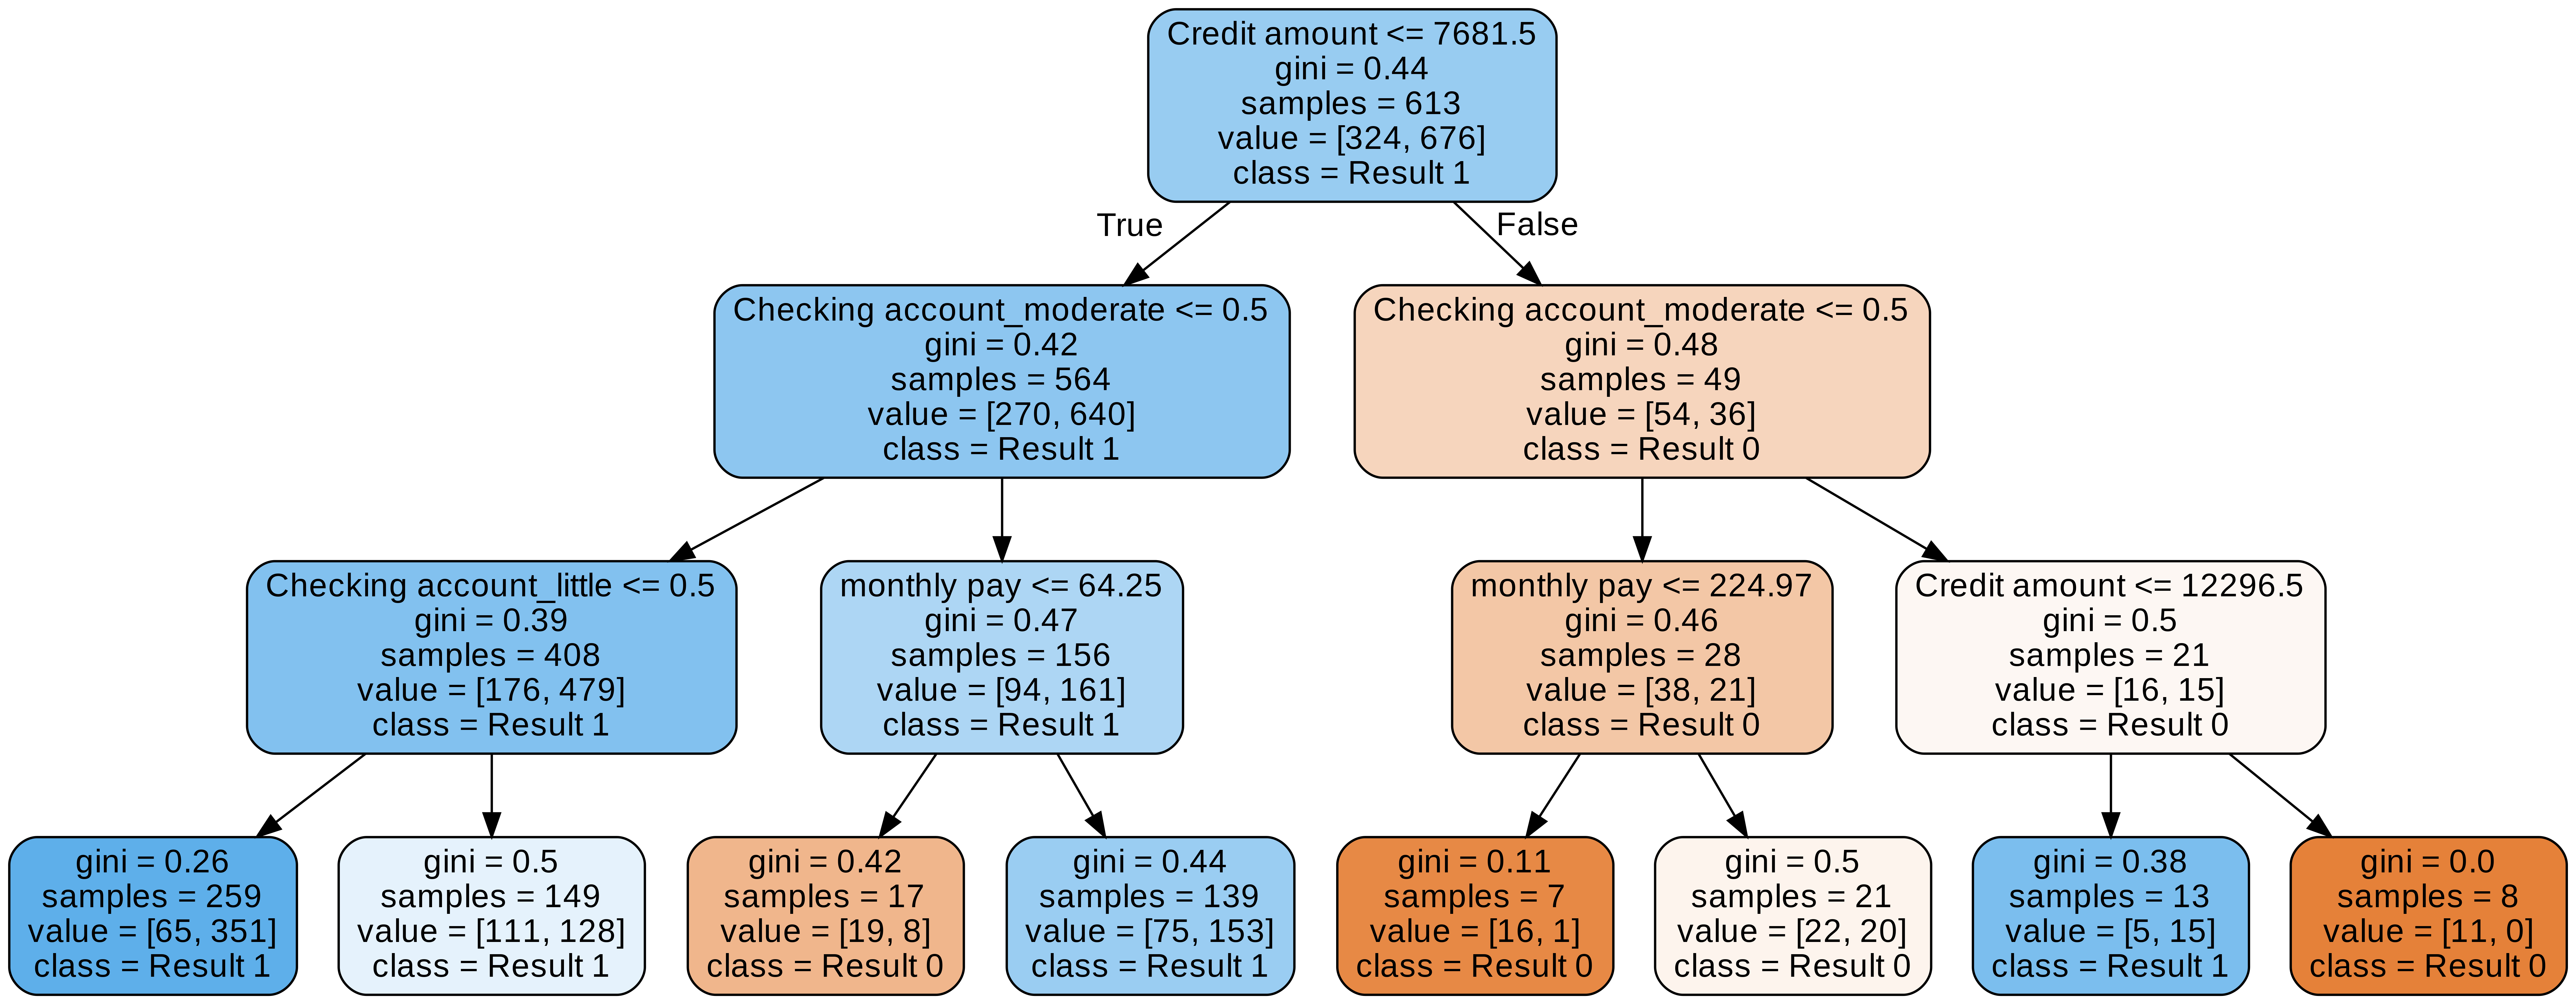

In [80]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

from IPython.display import Image
Image(filename = 'tree_limited.png')